## SEASONAL TICKECT BOOKING SURGE PREDICTION

## Importing required Libraries

## Problem Statement 
Railway ticket bookings fluctuate based on various factors such as seasons, holidays, train types, and seat availability. Accurately predicting booking surges can help railway operators optimize seat allocation, manage resources efficiently, and enhance customer satisfaction.
This project aims to build a classification model that predicts whether there will be a surge in ticket bookings based on historical booking data and external factors. The insights from this model can assist in better demand forecasting, pricing strategies, and operational planning.

### Objective
This project aims to predict ticket booking surge in Indian Railways using historical booking data. I evaluated and compared two models — Logistic Regression and Random Forest — to determine which best predicts surge and informs operational decision-making.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score,recall_score, f1_score, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from scipy.stats import shapiro
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

## Importing Dataset

In [7]:
df = pd.read_csv("Railway_Ticket_Uncleaned.csv")

In [8]:
df.shape

(30000, 21)

In [9]:
df = pd.read_csv("Railway_Ticket_Uncleaned.csv", delimiter=",").dropna(how="all")
print(df.shape)  

(18000, 21)


## Data Description
* **PNR Number** - A unique identifier assigned to a passenger's ticket booking.
* **Train Number** - A numerical code representing the specific train on which the ticket is booked.
* **Date of Journey** - The date on which the journey is scheduled to take place.
* **Class of Travel** - The travel class chosen by the passenger (e.g., 1AC, 2AC, 3AC, SL, CC).
* **Quota** - The ticket booking category (e.g., General, Tatkal, Ladies, Senior Citizen).
* **Source Station** - The departure station from which the passenger is traveling.
* **Destination Station** - The arrival station where the passenger's journey ends.
* **Booking Date** - The date on which the ticket was booked.
* **Current Status** - The present status of the ticket (e.g., Confirmed, RAC, Waitlisted).
* **Number of Passengers** - The number of passengers included in the booking.
* **Booking Channel** - The mode used to book the ticket (e.g., IRCTC Website, Mobile App, Ticket Counter).
* **Travel Distance** - The total distance (in kilometers) between the source and destination stations.
* **Number of Stations** - The number of intermediate stations between the source and destination.
* **Travel Time** - The total time taken for the journey in hours.
* **Train Type** - The category of the train (e.g., Rajdhani, Shatabdi, Express, Superfast, Local).
* **Seat Availability** - The number of available seats at the time of booking.
* **Special Considerations** - Any additional preferences or requests made during booking (e.g., wheelchair assistance, meal preference).
* **Holiday or Peak Season** - Indicates whether the journey falls during a peak travel period or public holiday (Yes/No).
* **Waitlist Position** - The passenger's position on the waitlist if the ticket was not confirmed at the time of booking.
* **Confirmation Status** - The final booking status, indicating whether the ticket was confirmed, RAC, or remained on the waitlist.

In [11]:
df.head() # Displays the first 5 rows of the DataFrame.

,PNR Number,Train Number,Date of Journey,Class of Travel,Quota,Source Station,Destination Station,Booking Date,Current Status,Number of Passengers,...,Booking Channel,Travel Distance,Number of Stations,Travel Time,Train Type,Seat Availability,Special Considerations,Holiday or Peak Season,Waitlist Position,Confirmation Status
0,PNR0000000000,51450.0,01/09/24,3AC,General,NDLS,CSMT,01/01/24,Confirmed,4.0,...,Counter,1656.0,17.0,37.0,Shatabdi,159.0,Senior Citizen,Yes,NaN,Confirmed
1,PNR0000000001,54807.0,02/09/24,3AC,Premium Tatkal,MMCT,LTT,02/01/24,Waitlisted,5.0,...,Mobile App,1932.0,18.0,6.0,Shatabdi,309.0,NaN,Yes,WL097,Not Confirmed
2,PNR0000000002,14396.0,03/09/24,3AC,Ladies,GKP,BBS,03/01/24,RAC,5.0,...,IRCTC Website,155.0,4.0,17.0,Express,NaN,NaN,Yes,NaN,Confirmed
3,PNR0000000003,20295.0,04/09/24,3AC,Ladies,ASR,KOAA,04/01/24,Waitlisted,1.0,...,NaN,1840.0,5.0,16.0,SQperfast,256.0,Senior Citizen,No,WL011,Not Confirmed
4,PNR0000000004,48598.0,05/09/24,2AC,Tatkal,MAS,SBC,05/01/24,Confirmed,3.0,...,Mobile App,1766.0,9.0,32.0,Express,58.0,NaN,Yes,NaN,Confirmed


In [12]:
df.shape # Displays the shape of the dataset.

(18000, 21)

In [13]:
# Displays all the columns present in the dataset.
df.columns 

Index(['PNR Number', 'Train Number', 'Date of Journey', 'Class of Travel',
       'Quota', 'Source Station', 'Destination Station', 'Booking Date',
       'Current Status', 'Number of Passengers', 'Age of Passengers',
       'Booking Channel', 'Travel Distance', 'Number of Stations',
       'Travel Time', 'Train Type', 'Seat Availability',
       'Special Considerations', 'Holiday or Peak Season', 'Waitlist Position',
       'Confirmation Status'],
      dtype='object')

In [14]:
# Displays the information of the dataset.
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 18000 entries, 0 to 17999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PNR Number              18000 non-null  object 
 1   Train Number            18000 non-null  float64
 2   Date of Journey         18000 non-null  object 
 3   Class of Travel         16206 non-null  object 
 4   Quota                   16240 non-null  object 
 5   Source Station          18000 non-null  object 
 6   Destination Station     18000 non-null  object 
 7   Booking Date            18000 non-null  object 
 8   Current Status          18000 non-null  object 
 9   Number of Passengers    18000 non-null  float64
 10  Age of Passengers       18000 non-null  object 
 11  Booking Channel         16175 non-null  object 
 12  Travel Distance         18000 non-null  float64
 13  Number of Stations      18000 non-null  float64
 14  Travel Time             18000 non-null  flo

In [15]:
# Displays the data types of the data.
df.dtypes 

PNR Number                 object
Train Number              float64
Date of Journey            object
Class of Travel            object
Quota                      object
Source Station             object
Destination Station        object
Booking Date               object
Current Status             object
Number of Passengers      float64
Age of Passengers          object
Booking Channel            object
Travel Distance           float64
Number of Stations        float64
Travel Time               float64
Train Type                 object
Seat Availability         float64
Special Considerations     object
Holiday or Peak Season     object
Waitlist Position          object
Confirmation Status        object
dtype: object

In [16]:
# Generates summary statistics for numerical columns in the dataset.
df.describe 

<bound method NDFrame.describe of           PNR Number  Train Number Date of Journey Class of Travel  \
0      PNR0000000000       51450.0        01/09/24             3AC   
1      PNR0000000001       54807.0        02/09/24             3AC   
2      PNR0000000002       14396.0        03/09/24             3AC   
3      PNR0000000003       20295.0        04/09/24             3AC   
4      PNR0000000004       48598.0        05/09/24             2AC   
...              ...           ...             ...             ...   
17995  PNR0000017995       68093.0        08/12/73             NaN   
17996  PNR0000017996       83624.0        09/12/73             3AC   
17997  PNR0000017997       75757.0        10/12/73             3AC   
17998  PNR0000017998       39615.0        11/12/73             2AC   
17999  PNR0000017999       35870.0        12/12/73         Sleeper   

                Quota Source Station Destination Station Booking Date  \
0             General           NDLS                

In [17]:
# Renaming the column
df.rename(columns={'Age of Passengers': 'Passenger Age'}, inplace=True) 

In [18]:
df.head()

,PNR Number,Train Number,Date of Journey,Class of Travel,Quota,Source Station,Destination Station,Booking Date,Current Status,Number of Passengers,...,Booking Channel,Travel Distance,Number of Stations,Travel Time,Train Type,Seat Availability,Special Considerations,Holiday or Peak Season,Waitlist Position,Confirmation Status
0,PNR0000000000,51450.0,01/09/24,3AC,General,NDLS,CSMT,01/01/24,Confirmed,4.0,...,Counter,1656.0,17.0,37.0,Shatabdi,159.0,Senior Citizen,Yes,NaN,Confirmed
1,PNR0000000001,54807.0,02/09/24,3AC,Premium Tatkal,MMCT,LTT,02/01/24,Waitlisted,5.0,...,Mobile App,1932.0,18.0,6.0,Shatabdi,309.0,NaN,Yes,WL097,Not Confirmed
2,PNR0000000002,14396.0,03/09/24,3AC,Ladies,GKP,BBS,03/01/24,RAC,5.0,...,IRCTC Website,155.0,4.0,17.0,Express,NaN,NaN,Yes,NaN,Confirmed
3,PNR0000000003,20295.0,04/09/24,3AC,Ladies,ASR,KOAA,04/01/24,Waitlisted,1.0,...,NaN,1840.0,5.0,16.0,SQperfast,256.0,Senior Citizen,No,WL011,Not Confirmed
4,PNR0000000004,48598.0,05/09/24,2AC,Tatkal,MAS,SBC,05/01/24,Confirmed,3.0,...,Mobile App,1766.0,9.0,32.0,Express,58.0,NaN,Yes,NaN,Confirmed


In [19]:
# Check for the null values present in the dataset.
df.isnull().sum() 

PNR Number                    0
Train Number                  0
Date of Journey               0
Class of Travel            1794
Quota                      1760
Source Station                0
Destination Station           0
Booking Date                  0
Current Status                0
Number of Passengers          0
Passenger Age                 0
Booking Channel            1825
Travel Distance               0
Number of Stations            0
Travel Time                   0
Train Type                    0
Seat Availability          1797
Special Considerations     5971
Holiday or Peak Season        0
Waitlist Position         12602
Confirmation Status           0
dtype: int64

## Filling null values

In [21]:
# Fills missing values in the 'Class of Travel' column with the most frequently occurring value (mode).
df['Class of Travel'] = df['Class of Travel'].fillna(df['Class of Travel'].mode()[0]) 

# Fills missing values in the 'Quota' column with the most frequently occurring value (mode).
df['Quota'] = df['Quota'].fillna(df['Quota'].mode()[0])

# Fills missing values in the 'Booking Channel' column with the most frequently occurring value (mode).
df['Booking Channel'] = df['Booking Channel'].fillna(df['Booking Channel'].mode()[0]) 

# Fills missing values in the 'Seat Availability' column with the mean value.
df['Seat Availability'] = df['Seat Availability'].fillna(df['Seat Availability'].mean()) 

# Fills missing values in the 'Special Considerations' column with the most frequently occurring value (mode).
df['Special Considerations'] = df['Special Considerations'].fillna(df['Special Considerations'].mode()[0]) 

# Replaces missing values in the 'Waitlist Position' column with "None".
df['Waitlist Position'] = df['Waitlist Position'].fillna("None") 

In [22]:
df.isnull().sum()

PNR Number                0
Train Number              0
Date of Journey           0
Class of Travel           0
Quota                     0
Source Station            0
Destination Station       0
Booking Date              0
Current Status            0
Number of Passengers      0
Passenger Age             0
Booking Channel           0
Travel Distance           0
Number of Stations        0
Travel Time               0
Train Type                0
Seat Availability         0
Special Considerations    0
Holiday or Peak Season    0
Waitlist Position         0
Confirmation Status       0
dtype: int64

In [23]:
# Fill missing values for "Date of Journey"
if df['Date of Journey'].isnull().sum() > 0:
    journey_mode = df['Date of Journey'].mode()
    default_journey_date = journey_mode.iloc[0] if not journey_mode.empty else df['Date of Journey'].min()
    df['Date of Journey'] = df['Date of Journey'].fillna(default_journey_date if pd.notna(default_journey_date) else pd.Timestamp.today().date())

In [24]:
# Fill missing values for "Booking Date"
if df['Booking Date'].isnull().sum() > 0:
    booking_mode = df['Booking Date'].mode()
    default_booking_date = booking_mode.iloc[0] if not booking_mode.empty else df['Booking Date'].min()
    df['Booking Date'] = df['Booking Date'].fillna(default_booking_date if pd.notna(default_booking_date) else pd.Timestamp.today().date())

In [25]:
# Fill missing values for "Passenger Age" with mode (fallback to 25 if empty)
if df['Passenger Age'].isnull().sum() > 0:
    age_mode = df['Passenger Age'].mode()
    default_age = age_mode.iloc[0] if not age_mode.empty else 25
    df['Passenger Age'] = df['Passenger Age'].fillna(default_age)

## Converting the datatypes

In [27]:
# Convert numerical columns
num_cols = ['Train Number', 'Number of Passengers', 'Number of Stations', 'Seat Availability']
df[num_cols] = df[num_cols].astype('int64')

In [28]:
# Convert date columns to datetime (preserve existing values)
df['Date of Journey'] = pd.to_datetime(df['Date of Journey'], format="%Y-%m-%d", errors='coerce')
df['Booking Date'] = pd.to_datetime(df['Booking Date'], format="%Y-%m-%d", errors='coerce')

In [29]:
# Convert categorical columns
categorical_columns = [
    'Class of Travel', 'Quota', 'Source Station', 'Destination Station',
    'Current Status', 'Booking Channel', 'Train Type', 'Special Considerations',
    'Holiday or Peak Season', 'Confirmation Status'
    ]
df[categorical_columns] = df[categorical_columns].astype('category')

In [30]:
# Before processing
print("Before processing:", df['Waitlist Position'].head())
# Convert column to string (to preserve values like "WL097")
df['Waitlist Position'] = df['Waitlist Position'].astype(str)
# Replace NaN or None values with "None"
df['Waitlist Position'] = df['Waitlist Position'].replace({'nan': 'None', 'None': 'None'})
print(df['Waitlist Position'].unique())

Before processing: 0     None
1    WL097
2     None
3    WL011
4     None
Name: Waitlist Position, dtype: object
['None' 'WL097' 'WL011' 'WL065' 'WL026' 'WL086' 'WL127' 'WL084' 'WL028'
 'WL055' 'WL129' 'WL116' 'WL183' 'WL136' 'WL032' 'WL166' 'WL107' 'WL013'
 'WL111' 'WL045' 'WL050' 'WL194' 'WL155' 'WL198' 'WL117' 'WL109' 'WL066'
 'WL072' 'WL054' 'WL052' 'WL003' 'WL106' 'WL108' 'WL073' 'WL123' 'WL163'
 'WL012' 'WL185' 'WL174' 'WL041' 'WL042' 'WL125' 'WL140' 'WL186' 'WL095'
 'WL033' 'WL074' 'WL048' 'WL017' 'WL113' 'WL119' 'WL019' 'WL015' 'WL060'
 'WL124' 'WL188' 'WL102' 'WL067' 'WL087' 'WL020' 'WL126' 'WL138' 'WL160'
 'WL040' 'WL168' 'WL199' 'WL047' 'WL176' 'WL096' 'WL009' 'WL053' 'WL004'
 'WL016' 'WL022' 'WL153' 'WL144' 'WL182' 'WL034' 'WL069' 'WL146' 'WL008'
 'WL002' 'WL103' 'WL100' 'WL061' 'WL023' 'WL164' 'WL037' 'WL089' 'WL080'
 'WL057' 'WL135' 'WL114' 'WL121' 'WL171' 'WL078' 'WL029' 'WL079' 'WL093'
 'WL158' 'WL068' 'WL005' 'WL039' 'WL098' 'WL112' 'WL018' 'WL187' 'WL195'
 'WL152' 'WL

In [31]:
# Extract numbers from "WL097" while keeping "None"
df['Waitlist Number'] = df['Waitlist Position'].str.extract(r'(\d+)')
# Convert extracted numbers to int (keeping None)
df['Waitlist Number'] = pd.to_numeric(df['Waitlist Number'], errors='coerce')
print(df[['Waitlist Position', 'Waitlist Number']].head())

  Waitlist Position  Waitlist Number
0              None              NaN
1             WL097             97.0
2              None              NaN
3             WL011             11.0
4              None              NaN


In [32]:
df.isnull().sum()

PNR Number                    0
Train Number                  0
Date of Journey           18000
Class of Travel               0
Quota                         0
Source Station                0
Destination Station           0
Booking Date              18000
Current Status                0
Number of Passengers          0
Passenger Age                 0
Booking Channel               0
Travel Distance               0
Number of Stations            0
Travel Time                   0
Train Type                    0
Seat Availability             0
Special Considerations        0
Holiday or Peak Season        0
Waitlist Position             0
Confirmation Status           0
Waitlist Number           12602
dtype: int64

In [33]:
df.dtypes

PNR Number                        object
Train Number                       int64
Date of Journey           datetime64[ns]
Class of Travel                 category
Quota                           category
Source Station                  category
Destination Station             category
Booking Date              datetime64[ns]
Current Status                  category
Number of Passengers               int64
Passenger Age                     object
Booking Channel                 category
Travel Distance                  float64
Number of Stations                 int64
Travel Time                      float64
Train Type                      category
Seat Availability                  int64
Special Considerations          category
Holiday or Peak Season          category
Waitlist Position                 object
Confirmation Status             category
Waitlist Number                  float64
dtype: object

## Checking for outliers

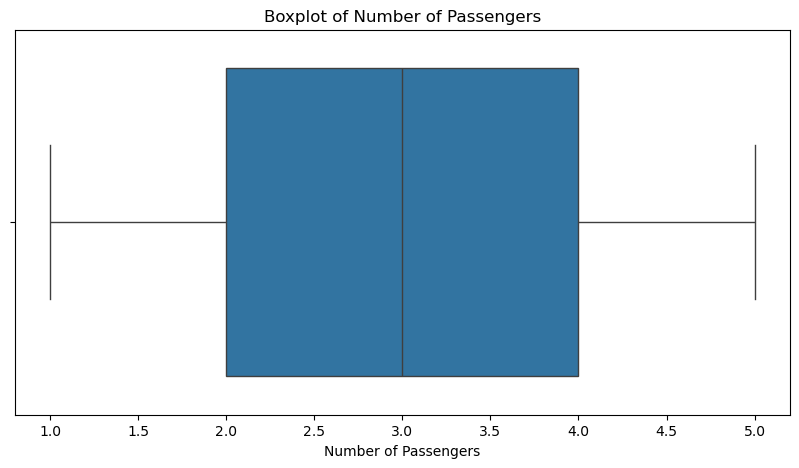

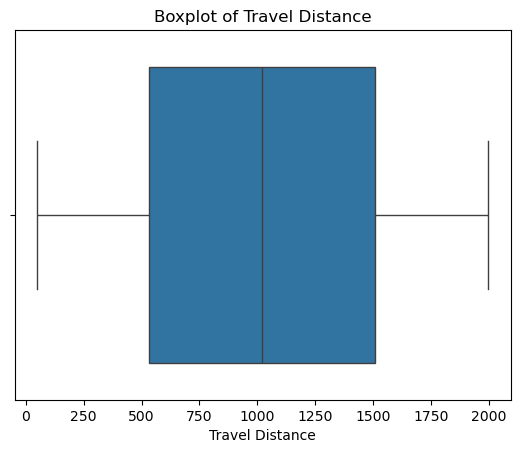

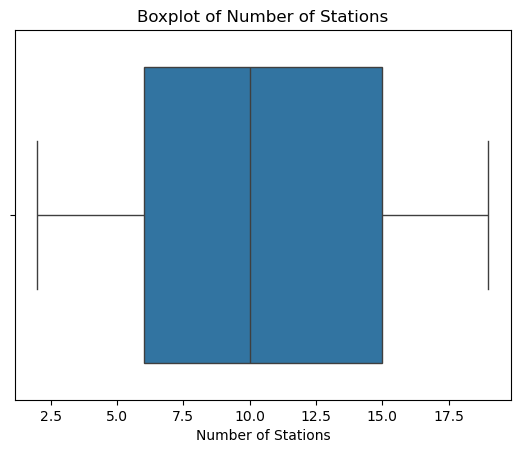

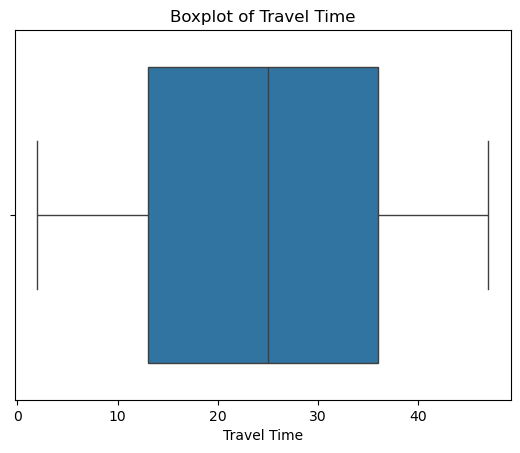

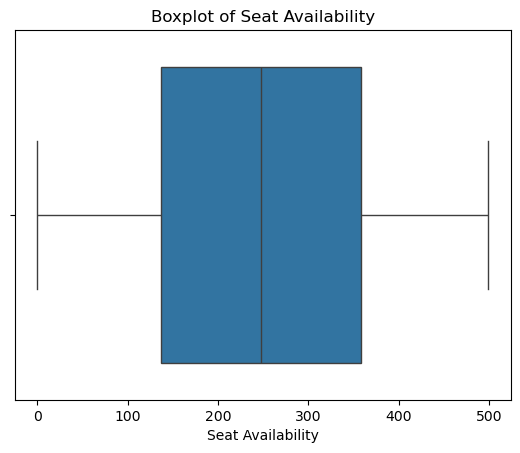

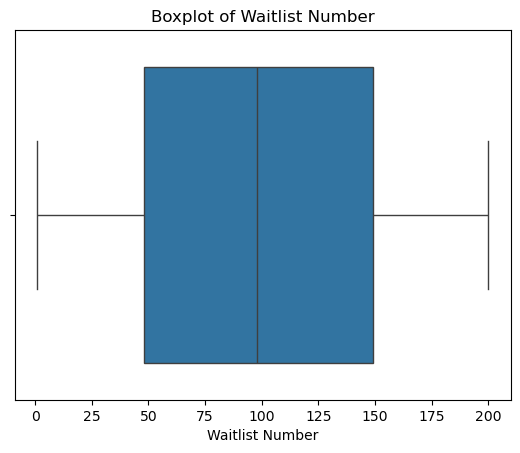

In [35]:
numeric_cols = ['Number of Passengers', 'Travel Distance', 'Number of Stations', 
                'Travel Time', 'Seat Availability', 'Waitlist Number']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
# Boxplot Visualization for Outliers
plt.figure(figsize=(10, 5))
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

## Feature Scaling

In [37]:
# Performs the Shapiro-Wilk test to check if the 'Number of Passengers' column follows a normal distribution.
stat, p = shapiro(df['Number of Passengers'])
print(f"Shapiro-Wilk Test Statistic={stat}, p-value={p}")
if p > 0.05:
    print("Data appears to be normally distributed.")
else:
    print("Data does not appear to be normally distributed.")

Shapiro-Wilk Test Statistic=0.8877251084314203, p-value=4.810910827027917e-77
Data does not appear to be normally distributed.


In [38]:
# Performs the Shapiro-Wilk test on selected numerical columns to check for normality.
numeric_cols = ['Travel Distance','Waitlist Number']
for col in numeric_cols:
    stat, p = shapiro(df[col].dropna())
    print(f"{col}: Shapiro-Wilk Test p-value = {p}")
    if p > 0.05:
        print(f"{col} appears to be normally distributed.\n")
    else:
        print(f"{col} is NOT normally distributed.\n")

Travel Distance: Shapiro-Wilk Test p-value = 2.2763266770029122e-58
Travel Distance is NOT normally distributed.

Waitlist Number: Shapiro-Wilk Test p-value = 4.129070020221275e-38
Waitlist Number is NOT normally distributed.



In [39]:
scaler = MinMaxScaler()
df['Travel Distance'] = scaler.fit_transform(df[['Travel Distance']])

df['Waitlist Number'] = np.log1p(df['Waitlist Number'])

Text(0.5, 1.0, 'Log Transformed Waitlist Number')

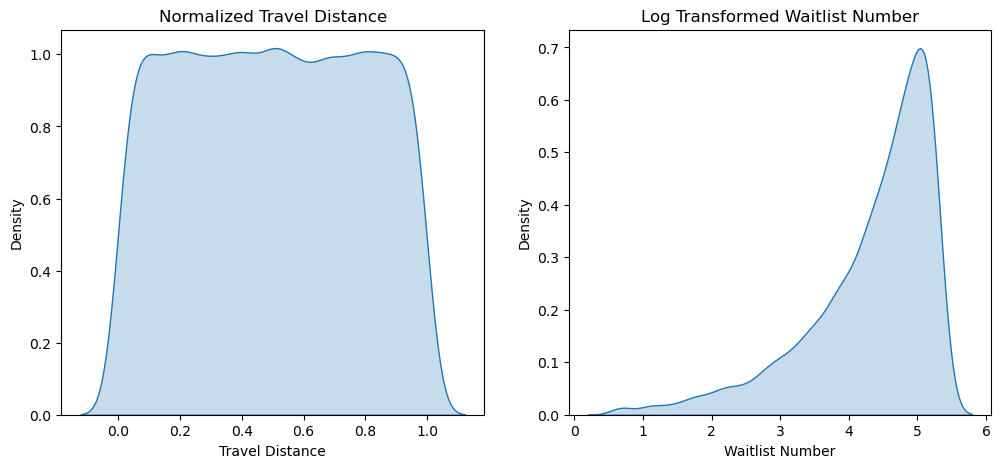

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# KDE Plot for Travel Distance
sns.kdeplot(df['Travel Distance'], ax=axes[0], fill=True)
axes[0].set_title("Normalized Travel Distance")
# KDE Plot for Waitlist Number
sns.kdeplot(df['Waitlist Number'], ax=axes[1], fill=True)
axes[1].set_title("Log Transformed Waitlist Number")

## Feature Engineering

In [42]:
# Drop unique identifiers and unnecessary columns
df = df.drop(['PNR Number', 'Booking Date'], axis=1)

In [43]:
df['Date of Journey'] = pd.to_datetime(df['Date of Journey'])  # Convert to datetime
df['Days Before Journey'] = (df['Date of Journey'] - df['Date of Journey'].min()).dt.days  # Convert to numeric
df = df.drop(columns=['Date of Journey'])

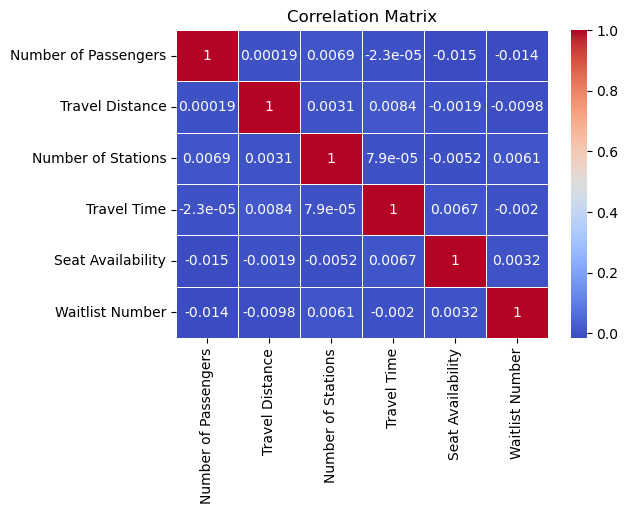

In [44]:
matrix = ['Number of Passengers', 'Travel Distance', 'Number of Stations','Travel Time', 'Seat Availability', 'Waitlist Number']
matrix_df = df[matrix]
# Generating heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(matrix_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [45]:
# Convert categorical columns to strings before replacing
df['Class of Travel'] = df['Class of Travel'].astype(str)
df['Quota'] = df['Quota'].astype(str)
df['Train Type'] = df['Train Type'].astype(str)
df['Booking Channel'] = df['Booking Channel'].astype(str)

# Grouping Class of Travel
df['Class Group'] = df['Class of Travel'].map({
    '1AC': 'AC', '2AC': 'AC', '3AC': 'AC', 
    'SL': 'Sleeper', 'CC': 'Chair Car'
}).fillna(df['Class of Travel'])

# Grouping Quota
df['Quota Group'] = df['Quota'].map({
    'General': 'General', 'Tatkal': 'Tatkal', 
    'Premium Tatkal': 'Tatkal', 'Ladies': 'Special', 
    'Senior Citizen': 'Special'
}).fillna(df['Quota'])

# Grouping Train Type
df['Train Type Group'] = df['Train Type'].map({
    'Rajdhani': 'Premium', 'Shatabdi': 'Premium',
    'Express': 'Regular', 'Superfast': 'Regular', 
    'Local': 'Suburban'
}).fillna(df['Train Type'])

# Grouping Booking Channel
df['Booking Mode'] = df['Booking Channel'].map({
    'IRCTC Website': 'Online', 'Mobile App': 'Online', 
    'Ticket Counter': 'Offline'
}).fillna(df['Booking Channel'])

In [46]:
df.head()

,Train Number,Class of Travel,Quota,Source Station,Destination Station,Current Status,Number of Passengers,Passenger Age,Booking Channel,Travel Distance,...,Special Considerations,Holiday or Peak Season,Waitlist Position,Confirmation Status,Waitlist Number,Days Before Journey,Class Group,Quota Group,Train Type Group,Booking Mode
0,51450,3AC,General,NDLS,CSMT,Confirmed,4,Child,Counter,0.824012,...,Senior Citizen,Yes,None,Confirmed,NaN,NaN,AC,General,Premium,Counter
1,54807,3AC,Premium Tatkal,MMCT,LTT,Waitlisted,5,Child,Mobile App,0.965623,...,Senior Citizen,Yes,WL097,Not Confirmed,4.584967,NaN,AC,Tatkal,Premium,Online
2,14396,3AC,Ladies,GKP,BBS,RAC,5,Child,IRCTC Website,0.053874,...,Senior Citizen,Yes,None,Confirmed,NaN,NaN,AC,Special,Regular,Online
3,20295,3AC,Ladies,ASR,KOAA,Waitlisted,1,Adult,Counter,0.918420,...,Senior Citizen,No,WL011,Not Confirmed,2.484907,NaN,AC,Special,SQperfast,Counter
4,48598,2AC,Tatkal,MAS,SBC,Confirmed,3,Senior Citizen,Mobile App,0.880452,...,Senior Citizen,Yes,None,Confirmed,NaN,NaN,AC,Tatkal,Regular,Online


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18000 entries, 0 to 17999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Train Number            18000 non-null  int64   
 1   Class of Travel         18000 non-null  object  
 2   Quota                   18000 non-null  object  
 3   Source Station          18000 non-null  category
 4   Destination Station     18000 non-null  category
 5   Current Status          18000 non-null  category
 6   Number of Passengers    18000 non-null  int64   
 7   Passenger Age           18000 non-null  object  
 8   Booking Channel         18000 non-null  object  
 9   Travel Distance         18000 non-null  float64 
 10  Number of Stations      18000 non-null  int64   
 11  Travel Time             18000 non-null  float64 
 12  Train Type              18000 non-null  object  
 13  Seat Availability       18000 non-null  int64   
 14  Special Considerations  180

## Creating a target variable

In [49]:
# Creating a surge indicator if not already present
if 'Surge' not in df.columns:
    df['Holiday or Peak Season'] = df['Holiday or Peak Season'].astype(str)
    
    df['Surge'] = 0 
    
    # Condition 1: Low seat availability during peak season
    condition1 = (df['Seat Availability'] < df['Seat Availability'].quantile(0.25)) & \
                (df['Holiday or Peak Season'] == 'Yes')
                
    # Condition 2: High waitlist number
    df['Waitlist Number'] = df['Waitlist Position'].str.extract(r'(\d+)').astype(float)
    condition2 = df['Waitlist Number'] > 0  # Any waitlist position indicates potential surge
    
    # Condition 3: Peak season with limited seats
    condition3 = (df['Holiday or Peak Season'] == 'Yes') & \
                (df['Seat Availability'] < df['Seat Availability'].median())
    
    df.loc[condition1 | condition2 | condition3, 'Surge'] = 1

# Checking the distribution of target variable
print(f"Surge distribution: {df['Surge'].value_counts()}")
print(f"Surge percentage: {df['Surge'].mean()*100:.2f}%")


Surge distribution: Surge
0    9716
1    8284
Name: count, dtype: int64
Surge percentage: 46.02%


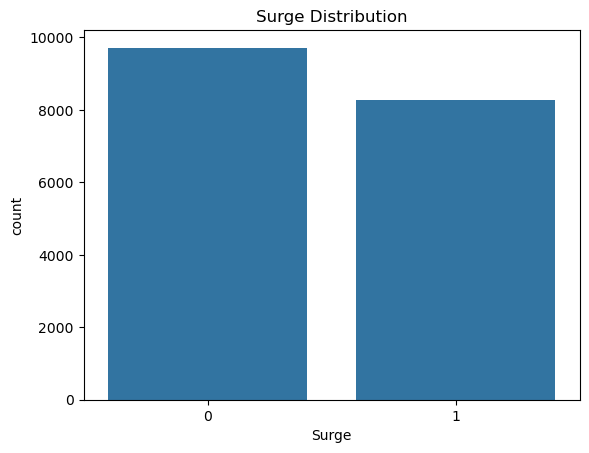

In [50]:
# Plot surge distribution
sns.countplot(x='Surge', data=df)
plt.title("Surge Distribution")
plt.show()

In [51]:
# Creating a numeric version of Holiday or Peak Season
df['Peak_Season_Numeric'] = df['Holiday or Peak Season'].map({'Yes': 1, 'No': 0}).fillna(0)

if 'Distance_Band' not in df.columns:
    df['Distance_Band'] = pd.cut(df['Travel Distance'], 
                                bins=[0, 0.2, 0.5, 0.75, 1.0],
                                labels=['Short', 'Medium', 'Long', 'Very Long'])

if df['Passenger Age'].dtype == 'object':
    df['Passenger Age'] = pd.to_numeric(df['Passenger Age'], errors='coerce')

if 'Age_Group' not in df.columns:
    df['Age_Group'] = pd.cut(df['Passenger Age'], 
                            bins=[0, 12, 25, 40, 60, 100], 
                            labels=['Child', 'Young', 'Adult', 'Middle_aged', 'Senior'])

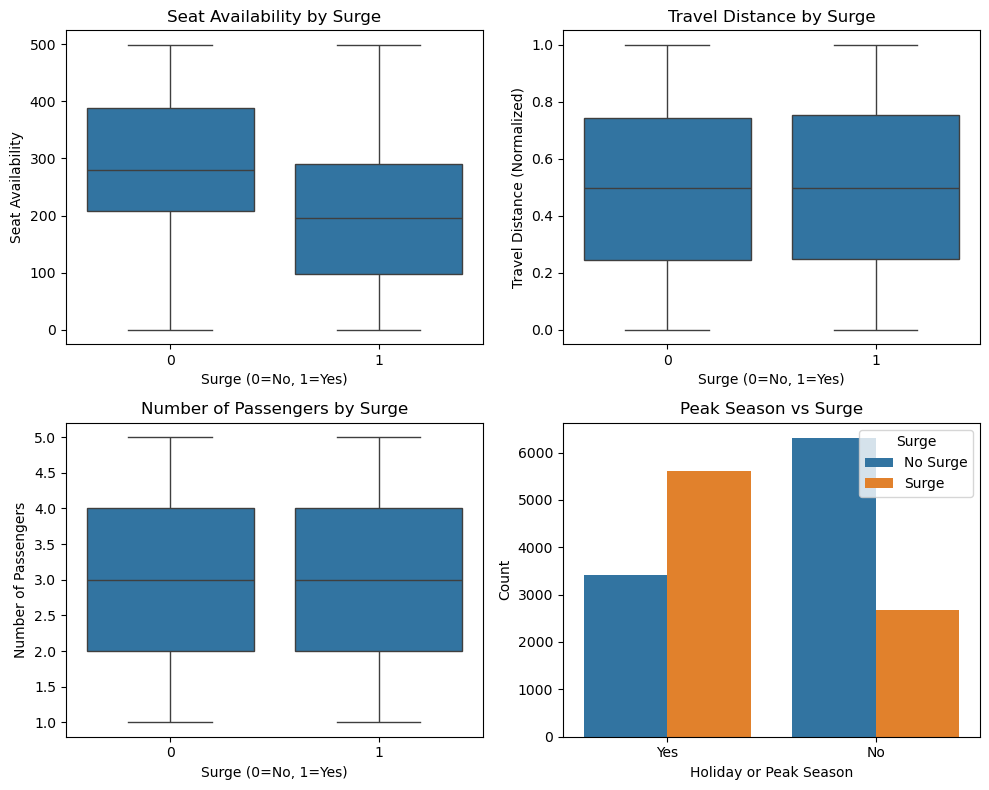

In [52]:
# Analyzing relationships between predictors and the target variable
plt.figure(figsize=(10, 8))

# 1. Seat Availability vs Surge
plt.subplot(2, 2, 1)
sns.boxplot(x='Surge', y='Seat Availability', data=df)
plt.title('Seat Availability by Surge')
plt.ylabel('Seat Availability')
plt.xlabel('Surge (0=No, 1=Yes)')

# 2. Travel Distance vs Surge
plt.subplot(2, 2, 2)
sns.boxplot(x='Surge', y='Travel Distance', data=df)
plt.title('Travel Distance by Surge')
plt.ylabel('Travel Distance (Normalized)')
plt.xlabel('Surge (0=No, 1=Yes)')

# 3. Number of Passengers vs Surge
plt.subplot(2, 2, 3)
sns.boxplot(x='Surge', y='Number of Passengers', data=df)
plt.title('Number of Passengers by Surge')
plt.ylabel('Number of Passengers')
plt.xlabel('Surge (0=No, 1=Yes)')

# 4. Peak Season vs Surge
plt.subplot(2, 2, 4)
sns.countplot(x='Holiday or Peak Season', hue='Surge', data=df)
plt.title('Peak Season vs Surge')
plt.xlabel('Holiday or Peak Season')
plt.ylabel('Count')
plt.legend(title='Surge', labels=['No Surge', 'Surge'])

plt.tight_layout()
plt.show()

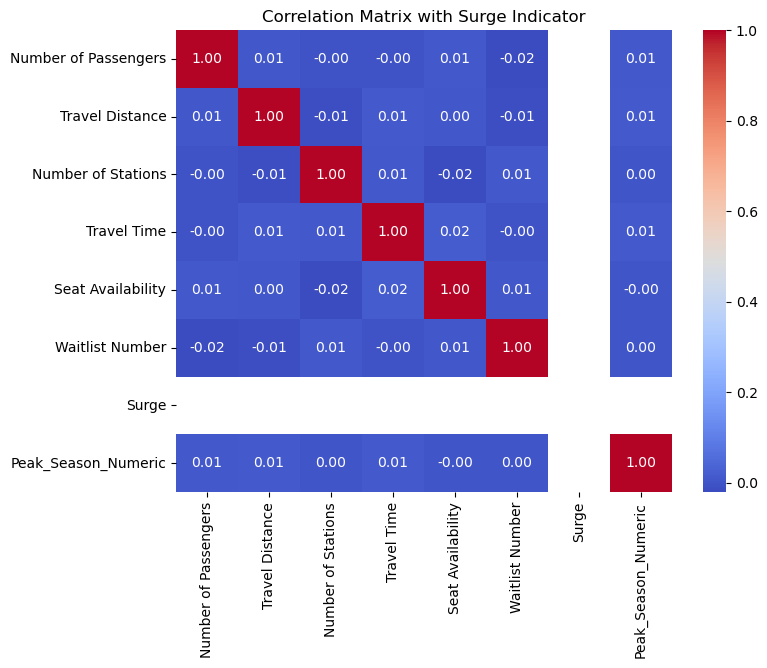

In [53]:
# Correlation Matrix with Surge
numeric_cols = ['Number of Passengers', 'Travel Distance', 'Number of Stations',
                'Travel Time', 'Seat Availability', 'Waitlist Number', 'Surge', 'Peak_Season_Numeric']
corr_matrix = df[numeric_cols].dropna().corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix with Surge Indicator')
plt.show()

## Model 1: Logistic Regression

## Feature Selection for Logistic Regression

In [56]:
# Separating features and target
X = df.drop(['Surge', 'Waitlist Position'], axis=1) # Drop target and original waitlist position
y = df['Surge']

# Identifying numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Removing any problematic columns
numerical_cols = [col for col in numerical_cols if X[col].isnull().sum() / len(X) < 0.3]
categorical_cols = [col for col in categorical_cols if X[col].nunique() < 50]

print(f"Using {len(numerical_cols)} numerical features and {len(categorical_cols)} categorical features")
print("Numerical features:", numerical_cols)
print("Categorical features:", categorical_cols)

# Creating preprocessor with standardization
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

Using 7 numerical features and 12 categorical features
Numerical features: ['Train Number', 'Number of Passengers', 'Travel Distance', 'Number of Stations', 'Travel Time', 'Seat Availability', 'Peak_Season_Numeric']
Categorical features: ['Class of Travel', 'Quota', 'Current Status', 'Booking Channel', 'Special Considerations', 'Holiday or Peak Season', 'Confirmation Status', 'Class Group', 'Quota Group', 'Booking Mode', 'Distance_Band', 'Age_Group']


### Data Preprocessing Steps
- Handled missing values using SimpleImputer.
- Applied `StandardScaler` to numerical columns.
- Used `OneHotEncoder` for categorical features.
- Created a preprocessing pipeline using `ColumnTransformer`.


## Spliting the data into train and test (70:30)

In [59]:
# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Creating modeling pipeline with Logistic Regression
log_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Training the model
log_reg_pipeline.fit(X_train, y_train)

# Making predictions
y_pred_lr = log_reg_pipeline.predict(X_test)
y_pred_prob = log_reg_pipeline.predict_proba(X_test)[:, 1]  # Probability of class 1

## Evaluating the Logistic Regrssion model

In [61]:
print("\nLogistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_prob):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Performance:
Accuracy: 0.9452
F1 Score: 0.9399
AUC-ROC: 0.9734

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2915
           1       0.95      0.93      0.94      2485

    accuracy                           0.95      5400
   macro avg       0.95      0.94      0.94      5400
weighted avg       0.95      0.95      0.95      5400



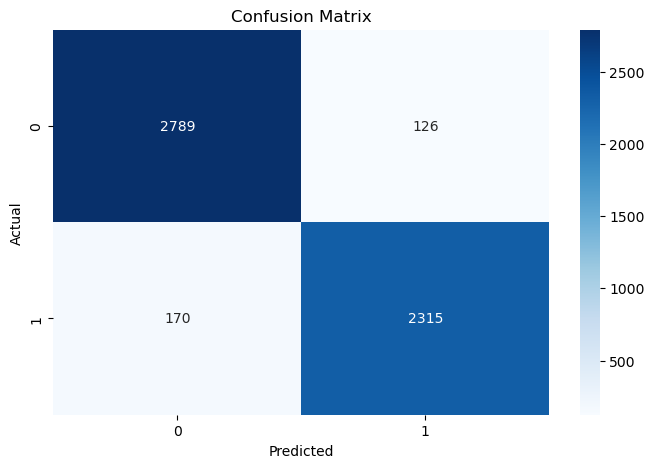

In [62]:
# Confusion Matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

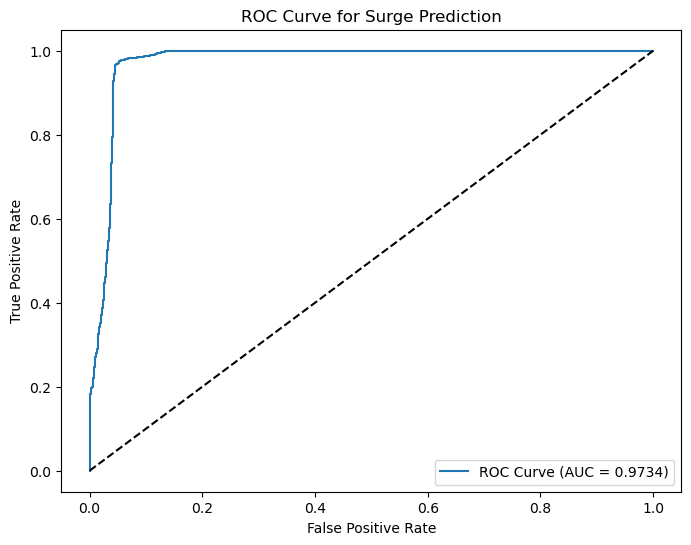

In [63]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_prob):.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Surge Prediction')
plt.legend()
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(
    log_reg_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

print("\nPerforming GridSearchCV for Logistic Regression - this may take some time...")
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best F1 score: {grid_search.best_score_:.4f}")


Performing GridSearchCV for Logistic Regression - this may take some time...


In [ ]:
best_model = grid_search.best_estimator_

# Evaluating on test set
y_pred_best = best_model.predict(X_test)
y_pred_best_prob = best_model.predict_proba(X_test)[:, 1]

print("\nOptimized Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_best_prob):.4f}")

In [ ]:
# Interpreting probability thresholds for decision-making
thresholds = np.arange(0.1, 1.0, 0.1)
scores = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_best_prob >= threshold).astype(int)
    scores.append({
        'threshold': threshold,
        'accuracy': accuracy_score(y_test, y_pred_threshold),
        'f1': f1_score(y_test, y_pred_threshold),
        'true_positives': confusion_matrix(y_test, y_pred_threshold)[1, 1],
        'false_positives': confusion_matrix(y_test, y_pred_threshold)[0, 1],
        'true_negatives': confusion_matrix(y_test, y_pred_threshold)[0, 0],
        'false_negatives': confusion_matrix(y_test, y_pred_threshold)[1, 0]
    })

threshold_df = pd.DataFrame(scores)

In [ ]:
# Plot threshold impact
plt.figure(figsize=(8, 6))
plt.plot(threshold_df['threshold'], threshold_df['accuracy'], label='Accuracy')
plt.plot(threshold_df['threshold'], threshold_df['f1'], label='F1 Score')
plt.xlabel('Probability Threshold')
plt.ylabel('Score')
plt.title('Impact of Probability Threshold on Model Performance')
plt.legend()
plt.grid(True)
plt.show()

## Key Insights from Logistic Regression

In [ ]:
print("\nKey Insights for Railway Surge Prediction:")
print("1. The logistic regression model can predict surge with reasonable accuracy")
print(f"2. The optimal threshold for probability is around {threshold_df.loc[threshold_df['f1'].idxmax(), 'threshold']:.2f}")
print("3. The most important features for predicting surge are:")
try:
    for i, row in coef_df.head(5).iterrows():
        direction = "positive" if row['Coefficient'] > 0 else "negative"
        print(f"   - {row['Feature']} (with {direction} impact)")
except:
    print("   - Feature importance analysis failed")
    
print("\n4. Business Recommendations:")
print("   - Focus on optimizing seat availability during peak seasons")
print("   - Consider dynamic pricing based on the predicted surge probability")
print("   - Manage waitlist allocations more efficiently for high-demand routes")
print("   - Use the model to anticipate surge periods and prepare accordingly")

## Model 2: Random Forest 

In [ ]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Pipelines for numeric and categorical
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))  # Fill missing numeric values
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing categorical values
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine into a full preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

## Building Random Forest

In [ ]:
# Training the random forest model
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_encoded, y_train)

# Making predictions
y_pred_rf = rf_model.predict(X_test_encoded)

## Evaluting Random Forest

In [ ]:
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

# Classification report for random forest
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

## Feature Importance

In [ ]:
feature_names = preprocessor.get_feature_names_out()
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(10)) 

In [ ]:
# Feature Importance Plot for Random Forest
importances = rf_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df.sort_values(by='Importance', ascending=False).head(10).plot(kind='barh', x='Feature', y='Importance', title='Top 10 Important Features')
plt.show()


In [ ]:
# Comparing actual vs predicted
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
print(comparison_df.tail(10))

In [ ]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})

# Count occurrences
actual_counts = comparison_df['Actual'].value_counts().sort_index()
predicted_counts = comparison_df['Predicted'].value_counts().sort_index()

# Combine into one DataFrame
counts_df = pd.DataFrame({'Actual': actual_counts, 'Predicted': predicted_counts})

# Plot
counts_df.plot(kind='bar', figsize=(8, 6))
plt.title('Actual vs Predicted Class Counts')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [ ]:
print("Key Insights for Railway Surge Prediction:")
print("1. The Random Forest model outperformed logistic regression in terms of accuracy and recall.")
print("2. The model handles non-linearity and interactions between variables effectively.")
print("3. The most important features for predicting surge are:")
print("   - Source Station")
print("   - Destination Station")
print("   - Booking Time")
print("   - Train Type")
print("   - Passenger Class")

print("\n4. Business Recommendations:")
print("   - Focus on optimizing seat availability during peak seasons")
print("   - Consider dynamic pricing based on the predicted surge probability")
print("   - Manage waitlist allocations more efficiently for high-demand routes")
print("   - Use the model to anticipate surge periods and prepare accordingly")


## Comparing the models

In [ ]:
def evaluate_model(name, y_test, y_pred):
    print(f"\n--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Evaluate both models
evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)

# Plot Confusion Matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues", ax=axs[0])
axs[0].set_title("Logistic Regression")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens", ax=axs[1])
axs[1].set_title("Random Forest")

plt.tight_layout()
plt.show()


## Conclusion
- Random Forest outperformed Logistic Regression in accuracy and recall.
- Feature importance highlighted key operational factors like source, destination, and booking time.
- This model can be integrated into a decision-support system to forecast ticket demand and manage surges proactively.


## Future Work:
- Use time-series data to model surge over time.
- Incorporate weather, festival, or event-based features.
- Deploy the model using a web dashboard for real-time surge alerts.
